In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error      # mean_squared_error为均方误差

In [10]:
digits=load_digits()
x=digits.data
y=digits.target

## 拟合

### learning_curve为学习曲线
learning_curve为学习曲线，查看模型的学习效果；通过学习曲线可以清晰的看出模型对数据的过拟合和欠拟合；

len(X_train) 个训练样本，训练出 len(X_train) 个模型，第一次使用一个样本训练出第一个模型，第二次使用两个样本训练出第二个模型，… ，第 len(X_train) 次使用 len(X_train) 个样本训练出最后一个模型；

每个模型对于训练这个模型所使用的部分训练数据集的预测值：y_train_predict = 模型.predict(X_train[ : i ])；

每个模型对于训练这个模型所使用的部分训练数据集的均方误差：train_scores=mean_squared_error(y_train[ : i ], y_train_predict)；

每个模型对于整个测试数据集的预测值：y_test_predict = 模型.predict(X_test)

每个模型对于整个测试数据集的预测的均方误差：test_scores=mean_squared_error(y_test, y_test_predict)；

绘制每次训练模型所用的样本数量与该模型对应的部分训练数据集的均方误差的平方根的关系曲线：plt.plot([i for i in range(1, len(X_train)+1)],np.sqrt(train_score), label=“train”)

绘制每次训练模型所用的样本数量与该模型对应的测试数据集的预测的均方误差的关系曲线：plt.plot([i for i in range(1, len(X_train)+1)],np.sqrt(test_score), label=“test”)

train_sizes参数：训练样本的相对的或绝对的数字，这些量的样本将会生成learning curve。如果dtype是float，他将会被视为最大数量训练集的一部分（这个由所选择的验证方法所决定）。否则，他将会被视为训练集的绝对尺寸。要注意的是，对于分类而言，样本的大小必须要充分大，达到对于每一个分类都至少包含一个样本的情况。

train_sizes_abs：array, shape = (n_unique_ticks,), dtype int用于生成learning curve的训练集的样本数。由于重复的输入将会被删除，所以ticks可能会少于n_ticks。如：当train_sizes_abs取0.1时表示，将数据分为训练集A和测试集B后，从A中选择10%做训练

### 刚刚好
随着样本的增加，训练集的效果会变好，测试集的拟合好

In [11]:
#gammma=0.001
train_sizes_abs,train_scores,test_scores=learning_curve(SVC(gamma=0.001),x,y,cv=10,scoring='accuracy',train_sizes=[0.1,0.25,0.5,0.75,1])

In [12]:
x.shape
train_sizes_abs
train_scores
train_scores.shape
test_scores

(1797, 64)

array([ 161,  403,  806, 1209, 1612])

array([[1.        , 0.99378882, 0.99378882, 0.99378882, 0.99378882,
        0.99378882, 0.99378882, 0.99378882, 0.99378882, 0.99378882],
       [1.        , 0.99751861, 0.99751861, 0.99751861, 0.99751861,
        0.99751861, 0.99751861, 0.99751861, 0.99751861, 0.99751861],
       [1.        , 0.99875931, 0.99875931, 0.99875931, 0.99875931,
        0.99875931, 0.99875931, 0.99875931, 0.99875931, 0.99875931],
       [1.        , 0.99834574, 0.99917287, 0.99917287, 0.99917287,
        0.99917287, 0.99917287, 0.99917287, 0.99917287, 0.99917287],
       [0.99937965, 0.99875931, 0.99875931, 0.99875931, 0.99875931,
        0.99875931, 0.99875931, 0.99875931, 0.99875931, 0.99937965]])

(5, 10)

array([[0.93513514, 0.91803279, 0.77348066, 0.69444444, 0.7877095 ,
        0.78212291, 0.91061453, 0.85955056, 0.83615819, 0.82954545],
       [0.91351351, 0.93989071, 0.87845304, 0.88888889, 0.91061453,
        0.87709497, 0.97206704, 0.94382022, 0.93785311, 0.93181818],
       [0.94054054, 0.9726776 , 0.93370166, 0.98888889, 0.97206704,
        0.97765363, 0.97765363, 0.97191011, 0.94350282, 0.9375    ],
       [0.94594595, 0.9726776 , 0.95027624, 0.98888889, 0.96089385,
        0.98324022, 0.99441341, 0.98876404, 0.97175141, 0.95454545],
       [0.95135135, 1.        , 0.95027624, 0.99444444, 0.98324022,
        0.98882682, 0.99441341, 0.99438202, 0.96610169, 0.96022727]])

In [19]:
#在10折的交叉验证数据上进行平均
train_scores_mean=train_scores.mean(axis=1)
test_scores_mean=test_scores.mean(axis=1)
train_scores_mean
test_scores_mean

array([0.99440994, 0.99776675, 0.99888337, 0.99917287, 0.99888337])

array([0.83267942, 0.91940142, 0.96160959, 0.97113971, 0.97832635])

Text(0.5, 0, 'training sample size')

Text(0, 0.5, 'accuracy')

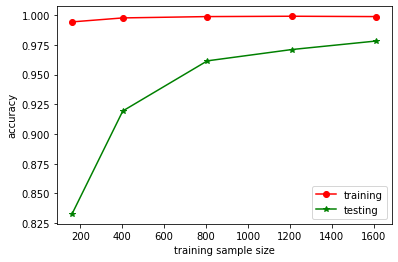

In [20]:
#绘制学习曲线
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color='r', label='training')
plt.plot(train_sizes_abs, test_scores_mean, '*-', color='g', label='testing')

plt.xlabel('training sample size')
plt.ylabel('accuracy')
plt.legend(loc='best')

#说明：随着样本个数的增多，拟合度越来越高

### 过拟合
gamma=0.1  时，会出现一开始时训练的效果就很好，但是用测试的结果不行

Text(0.5, 0, 'training sample size')

Text(0, 0.5, 'accuracy')

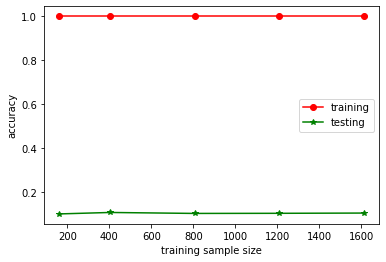

In [16]:
train_sizes_abs,train_scores,test_scores=learning_curve(SVC(gamma=0.1),x,y,cv=10,scoring='accuracy',train_sizes=[0.1,0.25,0.5,0.75,1])
train_scores_mean=train_scores.mean(axis=1)
test_scores_mean=test_scores.mean(axis=1)
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color='r', label='training')
plt.plot(train_sizes_abs, test_scores_mean, '*-', color='g', label='testing')

plt.xlabel('training sample size')
plt.ylabel('accuracy')
plt.legend(loc='best')

## 验证

### 验证曲线--validation_curve()
在曲线图上可以观察到gamma为哪个值时，模型的效果最好

In [22]:
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# 加载数据
digits = load_digits()
X = digits.data
y = digits.target

logspace用于创建等比数列，开始点和结束点是10的幂，0代表10的0次方，9代表10的9次方

a = np.logspace(0,0,10)会得到 array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [27]:
#param_range = np.arange(1, 6) / 500.
param_range = np.logspace(-6.5, -2, 10)
print(param_range)

train_scores, val_scores = validation_curve(
    SVC(), X, y, param_name='gamma', param_range=param_range,
    cv=5, scoring='accuracy')
#SVC()是要评估的模型，param_name参数存放的是模型中要评估的参数，param_range为参数的取值范围

# 在5折的交叉验证数据上进行平均
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(val_scores, axis=1)

[3.16227766e-07 1.00000000e-06 3.16227766e-06 1.00000000e-05
 3.16227766e-05 1.00000000e-04 3.16227766e-04 1.00000000e-03
 3.16227766e-03 1.00000000e-02]


In [25]:
a = np.logspace(1,2,10)
a

array([ 10.        ,  12.91549665,  16.68100537,  21.5443469 ,
        27.82559402,  35.93813664,  46.41588834,  59.94842503,
        77.42636827, 100.        ])

Text(0.5, 0, 'gamma')

Text(0, 0.5, 'accuracy')

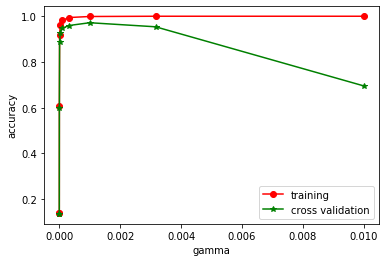

In [28]:
# 绘制学习曲线
plt.plot(param_range, train_scores_mean, 'o-', color='r', label='training')
plt.plot(param_range, test_scores_mean, '*-', color='g', label='cross validation')

plt.xlabel('gamma')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

#说明：从图中可以看出，绿线从0.001以后开始下降，处于过拟合状态

### 参数调整法--GridSearchCV（网格搜索法）
此外还有交叉验证法

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [12]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

svc函数中包含的参数主要有：C,kernel，gamma  等,线性回归（'kernel': ['linear']）没有gamma参数，

径向基函数（'kernel': ['rbf']）时有gamma参数

核函数有很多种，如线性核、多项式核、Sigmoid 核和 RBF（Radial Basis function）核

#### 获取选择的最优模型--best_estimator_

In [3]:
#会先做当（linear，1），（linear，10），（linear，100），（linear，1000）----->得到四个accuracy
#再做当kernel=rbf时，（c=1，gamma=0.001），（c=1，gamma=0.0001），（c=10，gamma=0.001）……
# 设置参数调整的范围及配置
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},  #线性回归不需要设置gamma参数
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

svm_model = svm.SVC() #此时并没有输入任何的参数

# 将超参数配置及模型放入GridSearch中进行自动搜索
clf = GridSearchCV(svm_model, param_grid, cv=5)
clf.fit(X_train, y_train)

# 获取选择的最优模型
best_model = clf.best_estimator_
best_model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

#### 选取最优的参数--best_params_ 

In [7]:
clf.best_params_      #此模型不需要gamma参数

{'C': 10, 'kernel': 'linear'}

#### 用最优模型进行预测 

In [16]:
predict=best_model.predict(X_test)
predict
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [19]:
accuracy_score(y_test,predict)  # 法一
best_model.score(X_test,y_test)    # 法二

1.0

1.0

## 特征选择

均用fit_transform进行拟合和处理

### 去除方差较小的特征
某维度的特征的方差小，说明所有样本中该特征差别小，则用该特征去区分样本的作用小

threshold参数根据方差保留80%的向量,threshold表示训练集方差低于此阈值的要素将被删除
举例来说，假设我们有一个具有布尔特征的数据集，并且我们希望在80％以上的样本中删除所有为1或0（打开或关闭）的特征。 布尔特征是伯努利随机变量（也就是当80%以上的样本的某个特征均为1或0时，该特征就要被删除）

In [25]:
from sklearn.feature_selection import VarianceThreshold
# 6个样本，3维的特征向量
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]


# 计算公式：var_thresh = p(1-p)
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

###  基于单变量统计特征选择
分布选择见：
https://scikitlearn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [26]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2   #卡方分布，用于分类问题，回归问题要用其他方法
iris = load_iris()
X, y = iris.data, iris.target
print('原始特征：')
print(X.shape)  #有四个特征
print(X[:5, :])

print()

# 使用卡方分布选择2个维度的变量，k表示保留几个特征
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)  #通过卡方分布去拟合每个特征的分布，进而进行选择
print('选取的特征：')
print(X_new.shape)   #保留了两个特征
print(X_new[:5, :])

原始特征：
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

选取的特征：
(150, 2)
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


### 基于模型的特征选择
常用的有随机森林、决策树等模型进行特征选择

SelectFromModel是一种元转换器，可以与那些有coef_ 或者feature_importances_属性的模型一起使用。如果coef_ 或者feature_importances_小于阈值（参数threshold），我们就认为特征是不重要的。除了指定阈值以外，也可以使用启发式的方式。有效的启发式方法包括均值、中位数或者乘以系数，比如 0.1*均值,阈值默认为 feature importances 的均值，大于或等于均值的选择，小于的不选择

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

iris = load_iris()
X, y = iris.data, iris.target
print('原始特征：')
print(X.shape)
print(X[:5, :])

clf = RandomForestClassifier()  #用来进行特征选择的模型，并不是之前用的逻辑回归、聚类等模型，二者目的是不同的
clf = clf.fit(X, y)
print('特征得分：')
print(clf.feature_importances_  )  #可以拿到特征上对应的得分

# 基于随机森林选择特征
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)   #不用再拟合了，直接transform即可
print('选取的特征：')
print(X_new.shape)
print(X_new[:5, :])

原始特征：
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
特征得分：
[0.15844373 0.01812516 0.37447022 0.44896089]
选取的特征：
(150, 2)
[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [29]:
help(SelectFromModel)

Help on class SelectFromModel in module sklearn.feature_selection.from_model:

class SelectFromModel(sklearn.base.BaseEstimator, sklearn.feature_selection.base.SelectorMixin, sklearn.base.MetaEstimatorMixin)
 |  SelectFromModel(estimator, threshold=None, prefit=False, norm_order=1, max_features=None)
 |  
 |  Meta-transformer for selecting features based on importance weights.
 |  
 |  .. versionadded:: 0.17
 |  
 |  Parameters
 |  ----------
 |  estimator : object
 |      The base estimator from which the transformer is built.
 |      This can be both a fitted (if ``prefit`` is set to True)
 |      or a non-fitted estimator. The estimator must have either a
 |      ``feature_importances_`` or ``coef_`` attribute after fitting.
 |  
 |  threshold : string, float, optional default None
 |      The threshold value to use for feature selection. Features whose
 |      importance is greater or equal are kept while the others are
 |      discarded. If "median" (resp. "mean"), then the ``thre